In [1]:
using DiffGP
using Flux
using Zygote
using PyPlot
using Random

Random.seed!(4);

┌ Info: Precompiling DiffGP [4d4e40ad-7e7d-4024-a1b1-ebf43adef3b8]
└ @ Base loading.jl:1273
┌ Info: CUDAdrv.jl failed to initialize, GPU functionality unavailable (set JULIA_CUDA_SILENT or JULIA_CUDA_VERBOSE to silence or expand this message)
└ @ CUDAdrv /Users/hongbinren/.julia/packages/CUDAdrv/mCr0O/src/CUDAdrv.jl:69


In [2]:
X = reshape(range(-π, π, length=100), 1, 100)
y = dropdims(sin.(X), dims=1)
noisy_y = y .+ 0.1*randn(100)
index = Array(1:100)
randperm!(index)

train_x, test_x = X[:, index[1:20]], X[:, index[21:end]]
train_y, test_y = noisy_y[index[1:20]], noisy_y[index[21:end]];

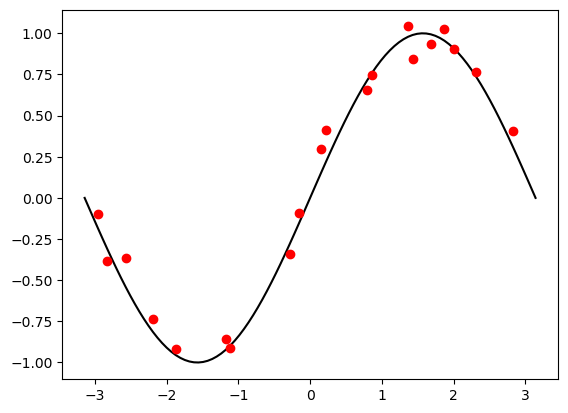

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x140f50b00>

In [3]:
plot(dropdims(X, dims=1), y, "k")
plot(dropdims(train_x, dims=1), train_y, "ro")

In [4]:
c_mean = ConstantMean()
isorbf_kernel = IsoGaussKernel()
noise_var = [0.01]
gp = GaussProcess(c_mean, isorbf_kernel, noise_var)

negloglik(gp, train_x, train_y)

6.663596813553729

In [5]:
ps = params(gp)

Params([[0.0], [0.9971982138775277], [0.8510065354351282], [0.01]])

┌ Info: step=1, loss=6.663596813553729
└ @ Main In[6]:11
┌ Info: step=100, loss=5.333206072869688
└ @ Main In[6]:11
┌ Info: step=200, loss=4.937098665794803
└ @ Main In[6]:11
┌ Info: step=300, loss=4.776394716150911
└ @ Main In[6]:11
┌ Info: step=400, loss=4.717225214049474
└ @ Main In[6]:11
┌ Info: step=500, loss=4.68580612020931
└ @ Main In[6]:11
┌ Info: step=600, loss=4.665571137872696
└ @ Main In[6]:11
┌ Info: step=700, loss=4.652671467346565
└ @ Main In[6]:11
┌ Info: step=800, loss=4.644779154364482
└ @ Main In[6]:11
┌ Info: step=900, loss=4.64015518039481
└ @ Main In[6]:11
┌ Info: step=1000, loss=4.637563545277061
└ @ Main In[6]:11
┌ Info: step=1100, loss=4.636176437052761
└ @ Main In[6]:11
┌ Info: step=1200, loss=4.635469182786906
└ @ Main In[6]:11
┌ Info: step=1300, loss=4.635126628756247
└ @ Main In[6]:11


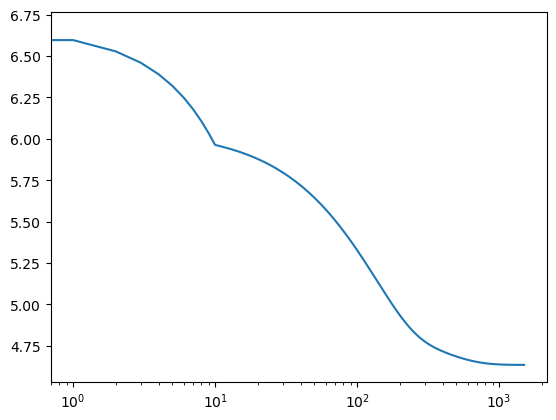

┌ Info: step=1400, loss=4.6349695171036025
└ @ Main In[6]:11
┌ Info: step=1500, loss=4.6349015064373305
└ @ Main In[6]:11


In [6]:
# minimize negative loglik

using Flux.Optimise: update!

optimizer = ADAM(0.001)
loss = []
for i in 1:1500
    ll = negloglik(gp, train_x, train_y)
    push!(loss, ll)
    if i==1 || i%100 == 0
        @info "step=$i, loss=$ll"
    end
    gs = gradient(()->negloglik(gp, train_x, train_y), ps)
    for p in ps
        update!(optimizer, p, gs[p])
    end
end

plot(loss)
xscale("log")

In [7]:
ps = params(gp)

Params([[0.09090910653623072], [1.4434731783350605], [0.6805313176934069], [-0.009736405745789713]])

In [8]:
pred_y, pred_σs = predict(gp, X, train_x, train_y);

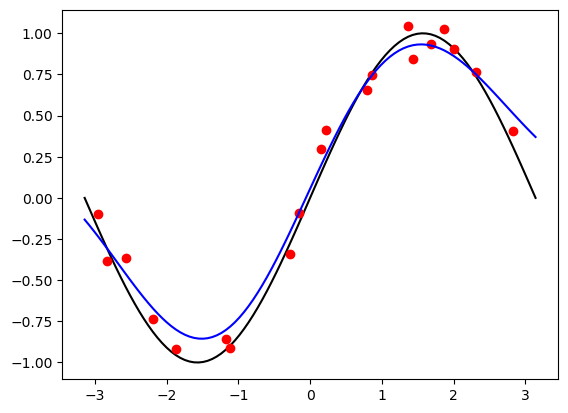

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x156b602e8>

In [9]:
plot(dropdims(X, dims=1), y, "k")
plot(dropdims(train_x, dims=1), train_y, "ro")
plot(dropdims(X, dims=1), pred_y, "b")